In [17]:
#参考链接： https://blog.csdn.net/qq_37333048/article/details/110469670

# 神经网络的搭建--回归任务 #
import torch
import torch.nn.functional as F     # 激励函数都在这
import matplotlib.pyplot as plt

# 建立数据
x = torch.unsqueeze(torch.linspace(-6.28, 6.28, 5000), dim=1)  # x data (tensor), shape=(100, 1)
# y = x.pow(3) + x.pow(2) + 2*x + 1 + 0.2*torch.rand(x.size())                 # noisy y data (tensor), shape=(100, 1)
y = torch.sin(x) +  0.1*torch.rand(x.size())

# 建立神经网络  这个神经网络 用于拟合 二次函数 有不错的
# class Net(torch.nn.Module):  # 继承 torch 的 Module
#     def __init__(self, n_feature, n_hidden, n_output):
#         super(Net, self).__init__()     # 继承 __init__ 功能
#         # 定义每层用什么样的形式
#         self.hidden = torch.nn.Linear(n_feature, n_hidden)   # 隐藏层线性输出
#         self.predict = torch.nn.Linear(n_hidden, n_output)   # 输出层线性输出

#     def forward(self, x):   # 这同时也是 Module 中的 forward 功能
#         # 正向传播输入值, 神经网络分析出输出值
#         x = F.relu(self.hidden(x))      # 激励函数(隐藏层的线性值)
#         x = self.predict(x)             # 输出值
#         return x
# net = Net(n_feature=1, n_hidden=10, n_output=1)

print(net)  # net 的结构


# 训练网络
# optimizer 是训练的工具
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)  # 传入 net 的所有参数, 学习率
loss_func = torch.nn.MSELoss()      # 预测值和真实值的误差计算公式 (均方差)

plt.ion()   # 画图
plt.show()

epoch_nums = 10000
index_list = []
loss_list = []
accuray_list = []

for t in range(epoch_nums):
    # prediction = net(x)     # 喂给 net 训练数据 x, 输出预测值
    prediction= net.forward(x)
    # print(prediction[:10])
    # print(f1[:10])

    loss = loss_func(prediction, y)     # 计算两者的误差

    optimizer.zero_grad()   # 清空上一步的残余更新参数值
    loss.backward()         # 误差反向传播, 计算参数更新值
    optimizer.step()        # 将参数更新值施加到 net 的 parameters 上

    loss_list.append(loss.data.numpy())
    index_list.append(t)

    # 可视化训练过程
    # if t % 100 == 0:
    #     # print(prediction)
    #     # print(net.forward(x))
    #     plt.cla()
    #     plt.scatter(x.data.numpy(), y.data.numpy())
    #     plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
    #     plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
    #     # if t<500:
    #     plt.pause(0.1)
    #     # else:
    #     #     plt.pause(1)

# plt.plot(t, loss_list, 'r-', lw=5)



Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


/var/folders/gn/ssxqcwcn36gghn2qpl6m6y7xyq77px/T/ipykernel_1173/3077368678.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,1,1)


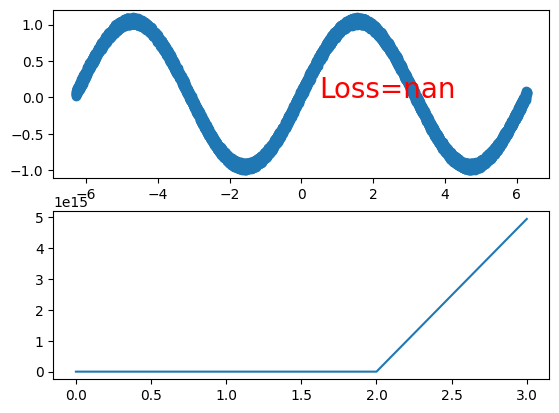

In [18]:
plt.cla()
plt.subplot(2,1,1)
plt.scatter(x.data.numpy(), y.data.numpy())
plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
plt.subplot(2,1,2)
plt.plot(index_list, loss_list)